In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os
from PIL import Image
from collections import Counter
import random
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

Total number of classes: 85
Class 1: 59 images
Class 2: 102 images
Class 3: 58 images
Class 4: 69 images
Class 5: 62 images
Class 6: 56 images
Class 7: 56 images
Class 8: 64 images
Class 9: 63 images
Class 10: 105 images
Class 11: 67 images
Class 12: 96 images
Class 13: 84 images
Class 14: 109 images
Class 15: 102 images
Class 16: 88 images
Class 17: 101 images
Class 18: 87 images
Class 19: 101 images
Class 20: 77 images
Class 21: 78 images
Class 22: 74 images
Class 23: 75 images
Class 24: 43 images
Class 25: 74 images
Class 26: 76 images
Class 27: 77 images
Class 28: 68 images
Class 29: 69 images
Class 30: 70 images
Class 31: 44 images
Class 32: 71 images
Class 33: 77 images
Class 34: 74 images
Class 35: 70 images
Class 36: 81 images
Class 37: 66 images
Class 38: 73 images
Class 39: 73 images
Class 40: 72 images
Class 41: 74 images
Class 42: 73 images
Class 43: 65 images
Class 44: 79 images
Class 45: 76 images
Class 46: 68 images
Class 47: 43 images
Class 48: 82 images
Class 49: 79 im

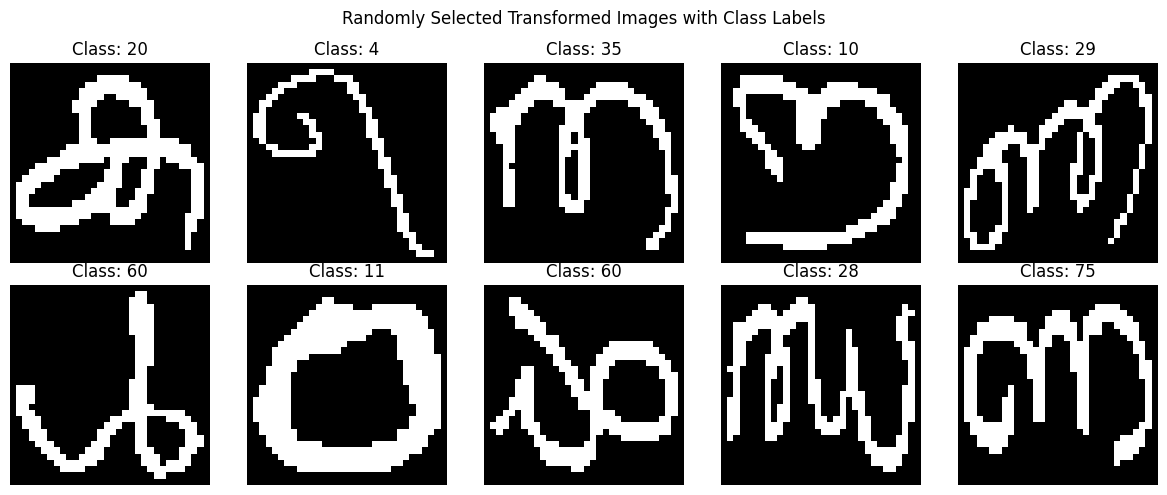

In [7]:
train_data = pd.read_csv("Handwritten_V2_test.csv")
test_data = pd.read_csv("Handwritten_V2_test.csv")
validate_data = pd.read_csv("Handwritten_V2_valid.csv")

# Extract labels and images
train_labels = train_data.iloc[:, 0].values  # First column as labels
train_images = train_data.iloc[:, 1:].values  # Remaining columns as pixel values
train_images = train_images.reshape(-1, 32, 32)  # Reshape to (num_samples, 32, 32)

# Apply transformation (rotate 90° right & mirror)
processed_images = []
for img in train_images:
    img_pil = Image.fromarray((img * 255).astype(np.uint8))  # Convert array to image
    img_rotated = img_pil.rotate(-90)  # Rotate 90° clockwise
    img_mirrored = img_rotated.transpose(Image.FLIP_LEFT_RIGHT)  # Mirror (flip horizontally)
    processed_images.append(np.array(img_mirrored) / 255.0)  # Normalize again

# Convert list back to NumPy array
train_images = np.array(processed_images)

# Create output directory for sorted images
output_dir = "Train_Images"
os.makedirs(output_dir, exist_ok=True)

# Count images per class
class_counts = Counter(train_labels)

# Print number of unique classes
print(f"Total number of classes: {len(class_counts)}")

# Create subdirectories for each class and print counts
for class_label, count in class_counts.items():
    class_folder = os.path.join(output_dir, str(class_label))
    os.makedirs(class_folder, exist_ok=True)
    print(f"Class {class_label}: {count} images")

# Save processed images into corresponding class folders
for i, (image, label) in enumerate(zip(train_images, train_labels)):
    image_path = os.path.join(output_dir, str(label), f"image_{i}.png")
    img = Image.fromarray((image * 255).astype(np.uint8))  # Convert back to image
    img.save(image_path)

print(f"\nImages successfully saved into class folders inside '{output_dir}'")

# ------ Plot Random Images with Class Labels ------

# Select random indices
random_indices = random.sample(range(len(train_labels)), 10)  # Select 10 random images

# Plot images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle("Randomly Selected Transformed Images with Class Labels")

for ax, idx in zip(axes.flat, random_indices):
    image = train_images[idx]  # Get the transformed image
    label = train_labels[idx]  # Get the corresponding label

    ax.imshow(image, cmap='gray')  # Plot image
    ax.set_title(f'Class: {label}')  # Set title
    ax.axis('off')

plt.tight_layout()
plt.show()

Total number of classes: 85
Class 1: 59 images
Class 2: 102 images
Class 3: 58 images
Class 4: 69 images
Class 5: 62 images
Class 6: 56 images
Class 7: 56 images
Class 8: 64 images
Class 9: 63 images
Class 10: 105 images
Class 11: 67 images
Class 12: 96 images
Class 13: 84 images
Class 14: 109 images
Class 15: 102 images
Class 16: 88 images
Class 17: 101 images
Class 18: 87 images
Class 19: 101 images
Class 20: 77 images
Class 21: 78 images
Class 22: 74 images
Class 23: 75 images
Class 24: 43 images
Class 25: 74 images
Class 26: 76 images
Class 27: 77 images
Class 28: 68 images
Class 29: 69 images
Class 30: 70 images
Class 31: 44 images
Class 32: 71 images
Class 33: 77 images
Class 34: 74 images
Class 35: 70 images
Class 36: 81 images
Class 37: 66 images
Class 38: 73 images
Class 39: 73 images
Class 40: 72 images
Class 41: 74 images
Class 42: 73 images
Class 43: 65 images
Class 44: 79 images
Class 45: 76 images
Class 46: 68 images
Class 47: 43 images
Class 48: 82 images
Class 49: 79 im

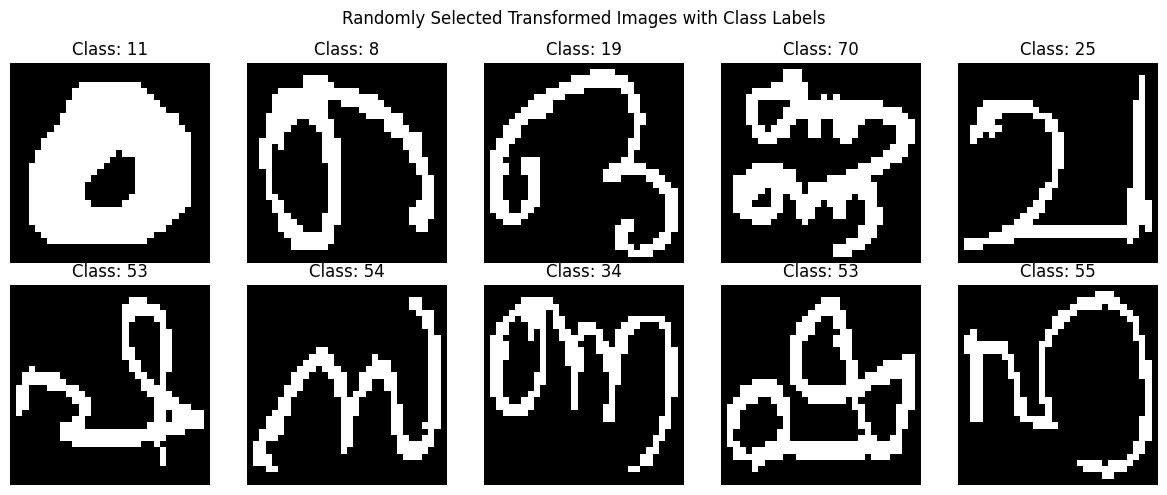

In [8]:
# Extract labels and images
test_labels = test_data.iloc[:, 0].values  # First column as labels
test_images = test_data.iloc[:, 1:].values  # Remaining columns as pixel values
test_images = test_images.reshape(-1, 32, 32)  # Reshape to (num_samples, 32, 32)

# Apply transformation (rotate 90° right & mirror)
processed_images = []
for img in test_images:
    img_pil = Image.fromarray((img * 255).astype(np.uint8))  # Convert array to image
    img_rotated = img_pil.rotate(-90)  # Rotate 90° clockwise
    img_mirrored = img_rotated.transpose(Image.FLIP_LEFT_RIGHT)  # Mirror (flip horizontally)
    processed_images.append(np.array(img_mirrored) / 255.0)  # Normalize again

# Convert list back to NumPy array
test_images = np.array(processed_images)

# Create output directory for sorted images
output_dir = "Test_Images"
os.makedirs(output_dir, exist_ok=True)

# Count images per class
class_counts = Counter(test_labels)

# Print number of unique classes
print(f"Total number of classes: {len(class_counts)}")

# Create subdirectories for each class and print counts
for class_label, count in class_counts.items():
    class_folder = os.path.join(output_dir, str(class_label))
    os.makedirs(class_folder, exist_ok=True)
    print(f"Class {class_label}: {count} images")

# Save processed images into corresponding class folders
for i, (image, label) in enumerate(zip(test_images, test_labels)):
    image_path = os.path.join(output_dir, str(label), f"image_{i}.png")
    img = Image.fromarray((image * 255).astype(np.uint8))  # Convert back to image
    img.save(image_path)

print(f"\nImages successfully saved into class folders inside '{output_dir}'")

# ------ Plot Random Images with Class Labels ------

# Select random indices
random_indices = random.sample(range(len(test_labels)), 10)  # Select 10 random images

# Plot images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle("Randomly Selected Transformed Images with Class Labels")

for ax, idx in zip(axes.flat, random_indices):
    image = test_images[idx]  # Get the transformed image
    label = test_labels[idx]  # Get the corresponding label

    ax.imshow(image, cmap='gray')  # Plot image
    ax.set_title(f'Class: {label}')  # Set title
    ax.axis('off')

plt.tight_layout()
plt.show()

Total number of classes: 85
Class 1: 59 images
Class 2: 105 images
Class 3: 63 images
Class 4: 63 images
Class 5: 59 images
Class 6: 61 images
Class 7: 58 images
Class 8: 64 images
Class 9: 68 images
Class 10: 76 images
Class 11: 57 images
Class 12: 76 images
Class 13: 63 images
Class 14: 75 images
Class 15: 77 images
Class 16: 65 images
Class 17: 73 images
Class 18: 65 images
Class 19: 83 images
Class 20: 70 images
Class 21: 67 images
Class 22: 70 images
Class 23: 67 images
Class 24: 61 images
Class 25: 66 images
Class 26: 63 images
Class 27: 68 images
Class 28: 60 images
Class 29: 66 images
Class 30: 69 images
Class 31: 63 images
Class 32: 61 images
Class 33: 65 images
Class 34: 70 images
Class 35: 70 images
Class 36: 71 images
Class 37: 69 images
Class 38: 65 images
Class 39: 66 images
Class 40: 58 images
Class 41: 69 images
Class 42: 68 images
Class 43: 65 images
Class 44: 72 images
Class 45: 68 images
Class 46: 66 images
Class 47: 60 images
Class 48: 70 images
Class 49: 67 images


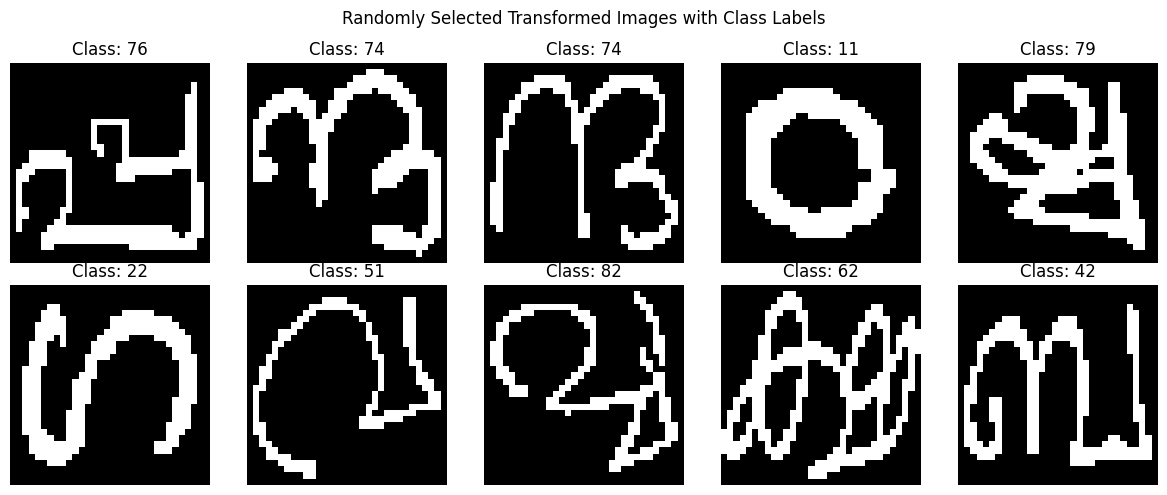

In [9]:
# Extract labels and images
validate_labels = validate_data.iloc[:, 0].values  # First column as labels
validate_images = validate_data.iloc[:, 1:].values  # Remaining columns as pixel values
validate_images = validate_images.reshape(-1, 32, 32)  # Reshape to (num_samples, 32, 32)

# Apply transformation (rotate 90° right & mirror)
processed_images = []
for img in validate_images:
    img_pil = Image.fromarray((img * 255).astype(np.uint8))  # Convert array to image
    img_rotated = img_pil.rotate(-90)  # Rotate 90° clockwise
    img_mirrored = img_rotated.transpose(Image.FLIP_LEFT_RIGHT)  # Mirror (flip horizontally)
    processed_images.append(np.array(img_mirrored) / 255.0)  # Normalize again

# Convert list back to NumPy array
validate_images = np.array(processed_images)

# Create output directory for sorted images
output_dir = "Validate_Images"
os.makedirs(output_dir, exist_ok=True)

# Count images per class
class_counts = Counter(validate_labels)

# Print number of unique classes
print(f"Total number of classes: {len(class_counts)}")

# Create subdirectories for each class and print counts
for class_label, count in class_counts.items():
    class_folder = os.path.join(output_dir, str(class_label))
    os.makedirs(class_folder, exist_ok=True)
    print(f"Class {class_label}: {count} images")

# Save processed images into corresponding class folders
for i, (image, label) in enumerate(zip(validate_images, validate_labels)):
    image_path = os.path.join(output_dir, str(label), f"image_{i}.png")
    img = Image.fromarray((image * 255).astype(np.uint8))  # Convert back to image
    img.save(image_path)

print(f"\nImages successfully saved into class folders inside '{output_dir}'")

# ------ Plot Random Images with Class Labels ------

# Select random indices
random_indices = random.sample(range(len(validate_labels)), 10)  # Select 10 random images

# Plot images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle("Randomly Selected Transformed Images with Class Labels")

for ax, idx in zip(axes.flat, random_indices):
    image = validate_images[idx]  # Get the transformed image
    label = validate_labels[idx]  # Get the corresponding label

    ax.imshow(image, cmap='gray')  # Plot image
    ax.set_title(f'Class: {label}')  # Set title
    ax.axis('off')

plt.tight_layout()
plt.show()

Class '1': 59 images before augmentation.
Class '10': 105 images before augmentation.
Class '11': 67 images before augmentation.
Class '12': 96 images before augmentation.
Class '13': 84 images before augmentation.
Class '14': 109 images before augmentation.
Class '15': 102 images before augmentation.
Class '16': 88 images before augmentation.
Class '17': 101 images before augmentation.
Class '18': 87 images before augmentation.
Class '19': 101 images before augmentation.
Class '2': 102 images before augmentation.
Class '20': 77 images before augmentation.
Class '21': 78 images before augmentation.
Class '22': 74 images before augmentation.
Class '23': 75 images before augmentation.
Class '24': 43 images before augmentation.
Class '25': 74 images before augmentation.
Class '26': 76 images before augmentation.
Class '27': 77 images before augmentation.
Class '28': 68 images before augmentation.
Class '29': 69 images before augmentation.
Class '3': 58 images before augmentation.
Class '3

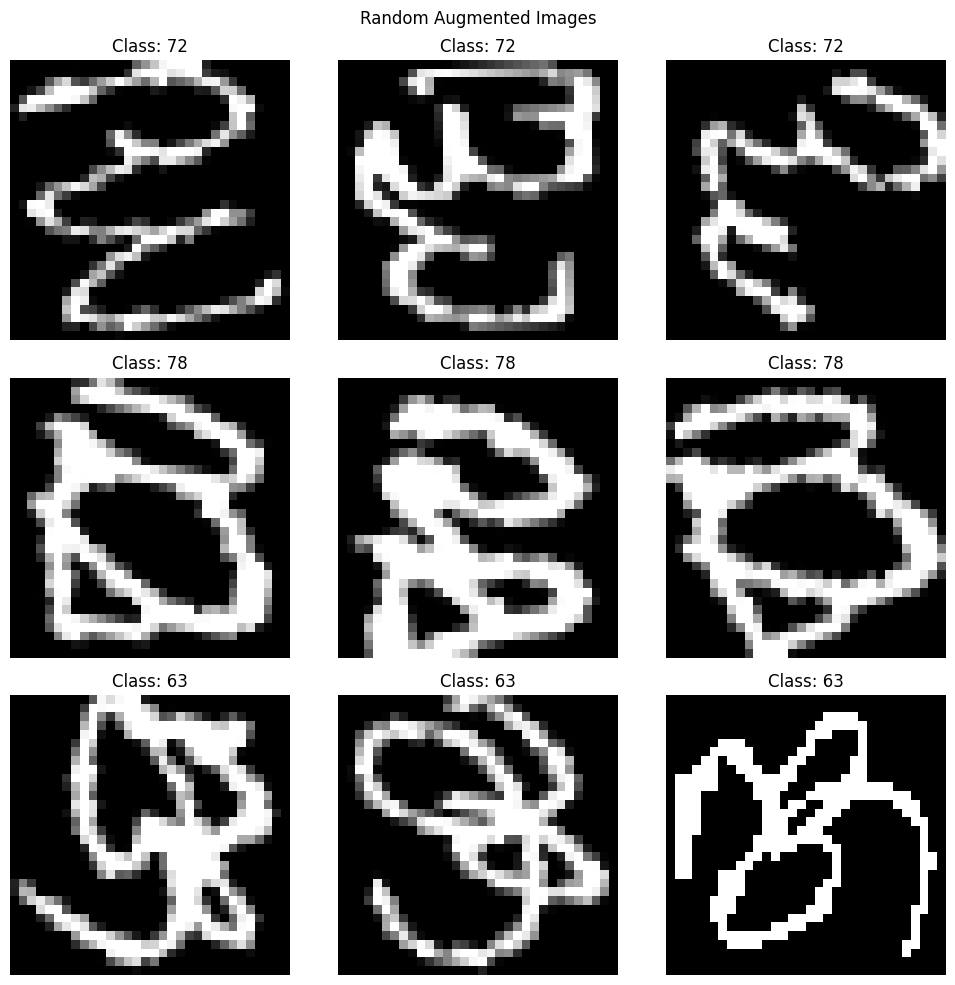

In [10]:
# Define paths
train_dir = "Train_Images"  # Root directory containing class subfolders
target_images_per_class = 500  # Ensure each class has at least 500 images

# Define ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # Rotate by ±20 degrees
    width_shift_range=0.02,   # Shift width by 2%
    height_shift_range=0.02,  # Shift height by 2%
    shear_range=0.15,        # Shear transformation
    zoom_range=0.02,          # Zoom in/out by 2%
    horizontal_flip=True,    # Flip horizontally
    fill_mode="nearest"      # Fill empty areas
)

# Function to rotate and mirror an image
def preprocess_image(image):
    # Rotate 90 degrees to the right
    image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    # Mirror the image
    image = cv2.flip(image, 1)  # Flip horizontally
    return image

# Store class counts before augmentation
class_counts = {}

# Loop through each class folder
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)

    if not os.path.isdir(class_path):
        continue  # Skip if not a directory

    # Get list of image files in the class folder
    image_files = [f for f in os.listdir(class_path) if f.endswith((".jpg", ".png", ".jpeg"))]
    num_images = len(image_files)
    class_counts[class_name] = num_images

    print(f"Class '{class_name}': {num_images} images before augmentation.")

    # Augment images if class has less than 500 images
    if num_images < target_images_per_class:
        required_images = target_images_per_class - num_images  # Number of new images needed
        images_to_augment = random.choices(image_files, k=required_images)  # Random selection

        for img_name in images_to_augment:
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path)  # Load image
            img = img_to_array(img)   # Convert to NumPy array

            # Apply initial rotation & mirroring
            img = preprocess_image(img)

            img = img.reshape((1,) + img.shape)  # Reshape for ImageDataGenerator

            # Generate augmented images
            i = 0
            for batch in datagen.flow(img, batch_size=1, save_to_dir=class_path, save_format="png"):
                i += 1
                if i >= 1:  # Generate 1 image per original image (adjustable)
                    break

# Print final class counts after augmentation
print("\nFinal class counts after augmentation:")
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.endswith((".jpg", ".png", ".jpeg", ".png"))])
        print(f"Class '{class_name}': {num_images} images")

# Plot some random augmented images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle("Random Augmented Images")

random_classes = random.sample(os.listdir(train_dir), min(3, len(os.listdir(train_dir))))  # Pick 3 random classes
for i, class_name in enumerate(random_classes):
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith((".jpg", ".png", ".jpeg"))]
    random_images = random.sample(image_files, min(3, len(image_files)))  # Pick 3 random images

    for j, img_name in enumerate(random_images):
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path)
        axes[i, j].imshow(img)
        axes[i, j].set_title(f"Class: {class_name}")
        axes[i, j].axis("off")

plt.tight_layout()
plt.show()

In [12]:
# Define directories
train_dir = "Train_Images"
test_dir = "Test_Images"
val_dir = "Validate_Images"

# Define image size & batch size
IMG_SIZE = (224, 224)  # Resize to 224x224 for MobileNetV2
BATCH_SIZE = 32

In [13]:
# Data Augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,   # Normalize pixel values (0-1)
    rotation_range=20,    # Rotate by ±20 degrees
    width_shift_range=0.2, # Horizontal shift
    height_shift_range=0.2, # Vertical shift
    shear_range=0.2,      # Shear transformation
    zoom_range=0.2,       # Zoom
    horizontal_flip=True, # Flip horizontally
    fill_mode="nearest"   # Fill missing pixels
)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"  # Multi-class classification
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# Get number of classes
num_classes = len(train_generator.class_indices)

Found 41736 images belonging to 85 classes.
Found 5705 images belonging to 85 classes.
Found 6359 images belonging to 85 classes.


In [13]:
# Load MobileNetV2 (pre-trained on ImageNet)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

In [14]:
# Build custom model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Replace Flatten with GAP
x = Dense(512, activation="relu")(x)  # Fully Connected Layer
x = BatchNormalization()(x)  # Batch Normalization
x = Dropout(0.4)(x)  # Dropout to prevent overfitting
x = Dense(256, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output_layer = Dense(num_classes, activation="softmax")(x)  # Output layer

# Create model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [15]:
# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,070,101 (11.71 MB)

 Trainable params: 810,581 (3.09 MB)

 Non-trainable params: 2,259,520 (8.62 MB)

In [16]:
# Train model
EPOCHS = 50 # Adjust based on dataset size
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 971s 740ms/step - accuracy: 0.0544 - loss: 4.6194 - val_accuracy: 0.0621 - val_loss: 3.9952
Epoch 2/50
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 708s 542ms/step - accuracy: 0.1720 - loss: 3.3154 - val_accuracy: 0.1204 - val_loss: 3.5413
Epoch 3/50
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 705s 540ms/step - accuracy: 0.2462 - loss: 2.8546 - val_accuracy: 0.1641 - val_loss: 3.2299
Epoch 4/50
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 708s 543ms/step - accuracy: 0.2950 - loss: 2.5801 - val_accuracy: 0.2065 - val_loss: 3.0218
Epoch 5/50
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 715s 548ms/step - accuracy: 0.3336 - loss: 2.3923 - val_accuracy: 0.2386 - val_loss: 2.7694
Epoch 6/50
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 748s 573ms/step - accuracy: 0.3621 - loss: 2.2691 - val_accuracy: 0.2826 - val_loss: 2.6369
Epoch 7/50
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 746s 572ms/step - accuracy: 0.3794 - loss: 2.1891 - val_accuracy: 0.2899 - val_loss: 2.5797
Epoch 8/50
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 754s 578ms/step - ac

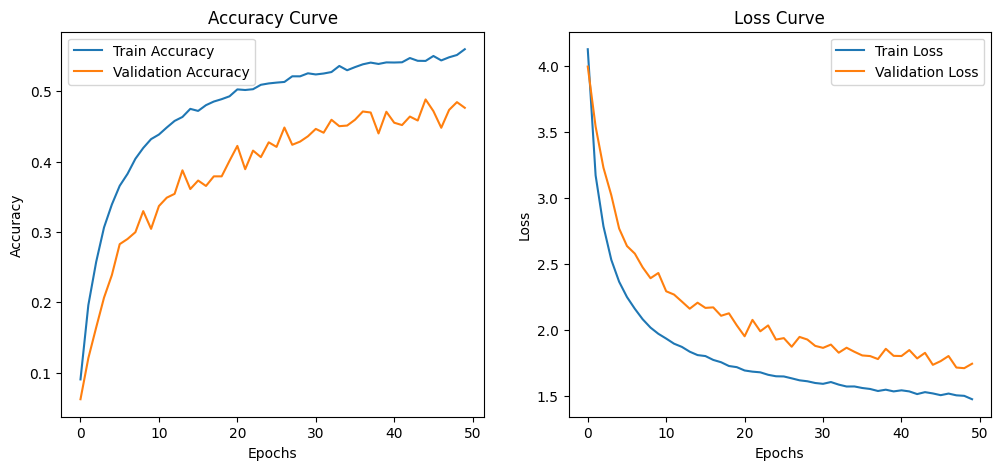

In [17]:
# Plot Accuracy & Loss Curves
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

plot_training_history(history)


In [18]:
EPOCHS = 10 
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(
    train_generator,
    validation_data=val_generator,
    batch_size = 32,
    epochs=EPOCHS
)

Epoch 1/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 985s 748ms/step - accuracy: 0.4250 - loss: 2.1679 - val_accuracy: 0.4345 - val_loss: 1.8995
Epoch 2/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 971s 744ms/step - accuracy: 0.7195 - loss: 0.8957 - val_accuracy: 0.7011 - val_loss: 0.8540
Epoch 3/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 960s 735ms/step - accuracy: 0.7912 - loss: 0.6603 - val_accuracy: 0.6759 - val_loss: 0.9659
Epoch 4/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 957s 733ms/step - accuracy: 0.8319 - loss: 0.5371 - val_accuracy: 0.7637 - val_loss: 0.7323
Epoch 5/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 957s 733ms/step - accuracy: 0.8634 - loss: 0.4393 - val_accuracy: 0.8219 - val_loss: 0.5441
Epoch 6/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 961s 737ms/step - accuracy: 0.8767 - loss: 0.3861 - val_accuracy: 0.8142 - val_loss: 0.6011
Epoch 7/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 953s 730ms/step - accuracy: 0.8914 - loss: 0.3395 - val_accuracy: 0.8098 - val_loss: 0.5787
Epoch 8/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 947s 726ms/step - ac

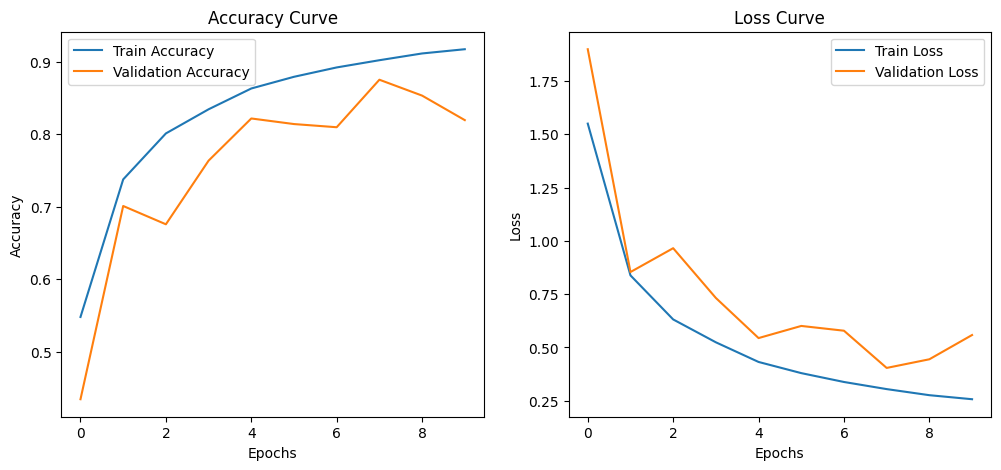

In [20]:
# Plot Accuracy & Loss Curves
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

plot_training_history(history)

In [21]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Best Model Test Accuracy: {test_acc:.4f}")

199/199 ━━━━━━━━━━━━━━━━━━━━ 106s 526ms/step - accuracy: 0.8600 - loss: 0.4163
Best Model Test Accuracy: 0.8792


In [23]:
model.save("best_model.h5")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

for layer in base_model.layers[:100]:  
    layer.trainable = False  # Keep first 100 layers frozen

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Set up callbacks
callbacks = [
    ModelCheckpoint("best_model.keras", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1),
    EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True, verbose=1)
]

# Train the model
history_finetune = model.fit(
    train_generator,  
    validation_data=val_generator,  
    batch_size=32,
    epochs=10,  # Increased epochs for fine-tuning
    callbacks=callbacks
)

Epoch 1/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 0s 697ms/step - accuracy: 0.9334 - loss: 0.2065
Epoch 1: val_accuracy improved from -inf to 0.91376, saving model to best_model.keras
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 993s 754ms/step - accuracy: 0.9334 - loss: 0.2065 - val_accuracy: 0.9138 - val_loss: 0.2729
Epoch 2/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 0s 691ms/step - accuracy: 0.9451 - loss: 0.1801
Epoch 2: val_accuracy improved from 0.91376 to 0.92235, saving model to best_model.keras
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 974s 746ms/step - accuracy: 0.9451 - loss: 0.1801 - val_accuracy: 0.9223 - val_loss: 0.2495
Epoch 3/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 0s 690ms/step - accuracy: 0.9498 - loss: 0.1624
Epoch 3: val_accuracy did not improve from 0.92235
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 973s 746ms/step - accuracy: 0.9498 - loss: 0.1624 - val_accuracy: 0.9220 - val_loss: 0.2500
Epoch 4/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 0s 690ms/step - accuracy: 0.9511 - loss: 0.1582
Epoch 4: val_accuracy did not improve from 0.

In [ ]:
# Load the best model
best_model = load_model("best_model.keras")

# Evaluate on test data
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"Best Model Test Accuracy: {test_acc:.4f}")

199/199 ━━━━━━━━━━━━━━━━━━━━ 85s 422ms/step - accuracy: 0.9699 - loss: 0.0915
Best Model Test Accuracy: 0.9692


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


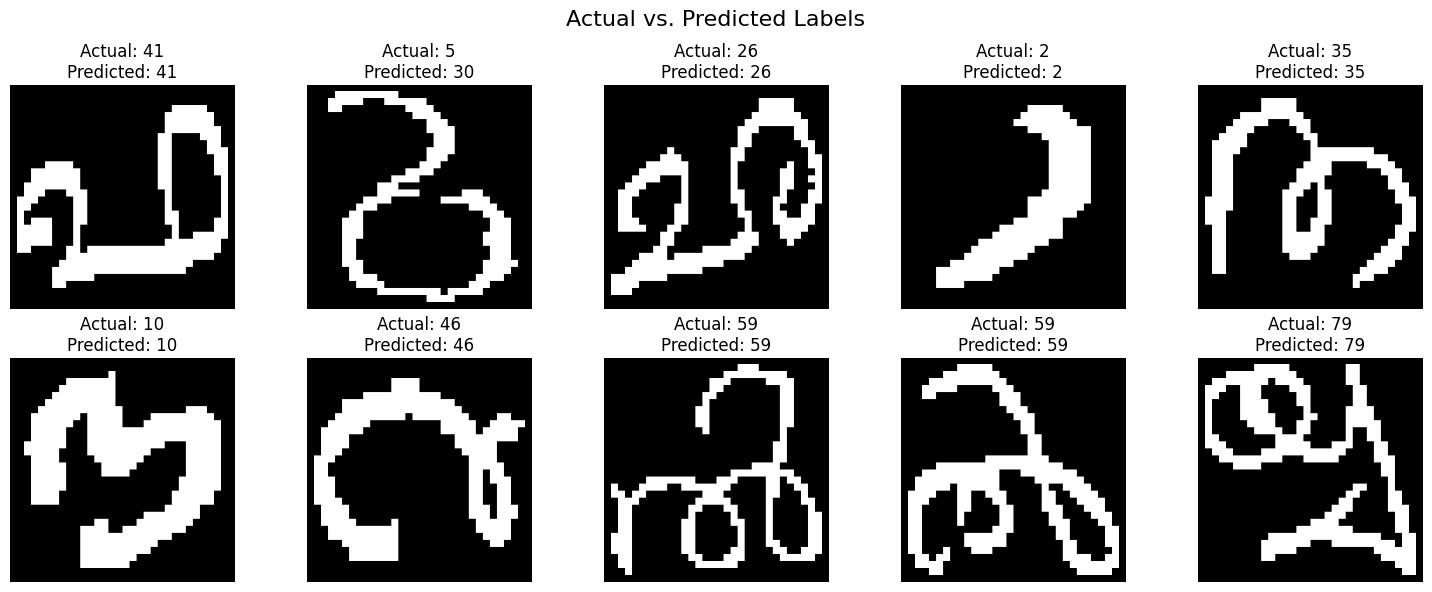

In [9]:
# Load the best trained model
model = load_model("best_model.keras")

# Set the test images directory
test_dir = "Test_Images"

# Get class labels (folder names inside Test_Images)
class_names = sorted(os.listdir(test_dir))

# Select 10 random images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("Actual vs. Predicted Labels", fontsize=16)

for i, ax in enumerate(axes.flat):
    class_name = random.choice(class_names)  # Pick a random class
    class_path = os.path.join(test_dir, class_name)
    
    # Get a random image from the class folder
    image_name = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, image_name)
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to (224, 224)
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input
    
    # Get the prediction
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]  # Convert index to class name
    
    # Plot the image with actual and predicted labels
    ax.imshow(img)
    ax.set_title(f"Actual: {class_name}\nPredicted: {predicted_class}")
    ax.axis("off")

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

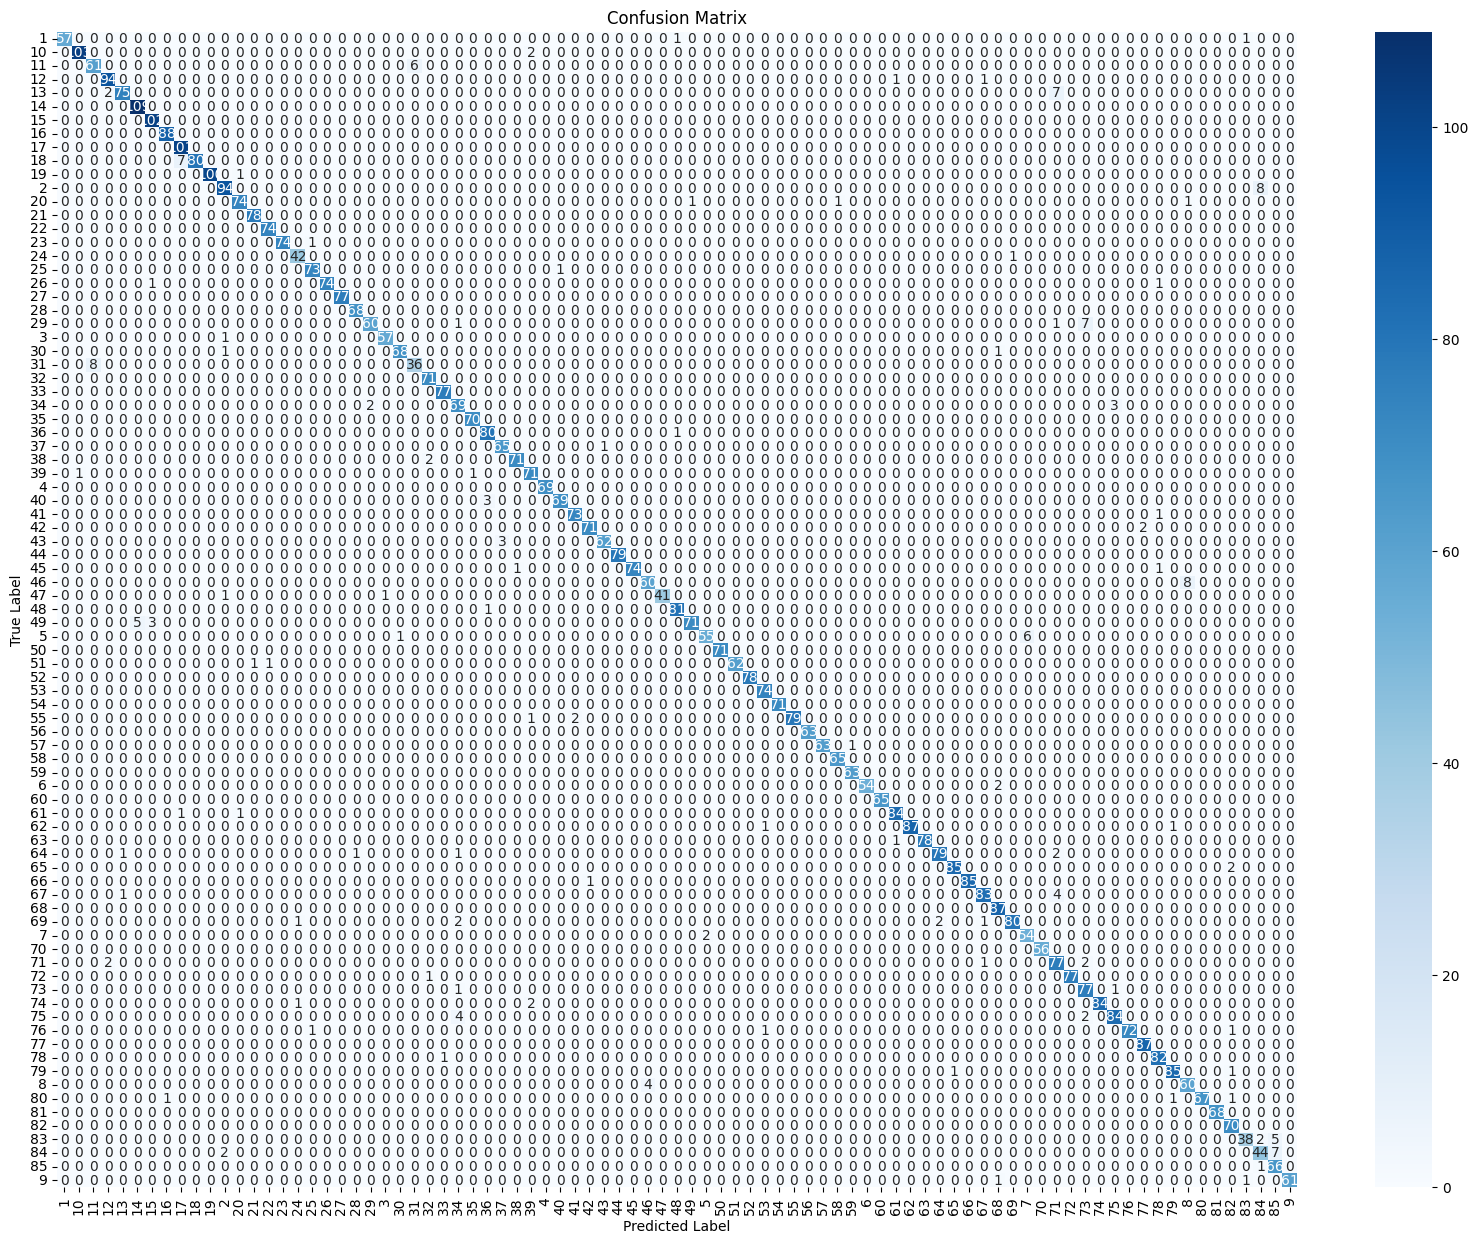


🔹 Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        59
          10       0.99      0.98      0.99       105
          11       0.88      0.91      0.90        67
          12       0.96      0.98      0.97        96
          13       0.97      0.89      0.93        84
          14       0.96      1.00      0.98       109
          15       0.96      1.00      0.98       102
          16       0.99      1.00      0.99        88
          17       0.93      1.00      0.96       101
          18       1.00      0.92      0.96        87
          19       1.00      0.99      1.00       101
           2       0.95      0.92      0.94       102
          20       0.97      0.96      0.97        77
          21       0.99      1.00      0.99        78
          22       0.99      1.00      0.99        74
          23       1.00      0.99      0.99        75
          24       0.95      0.98      0.97        43


In [16]:
# Get actual labels and predictions
y_true = []
y_pred = []

# Iterate over test dataset
for batch_images, batch_labels in test_generator:  # Assuming test_generator is defined
    predictions = model.predict(batch_images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(np.argmax(batch_labels, axis=1))

    if len(y_true) >= test_generator.samples:  # Stop when all images are covered
        break

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Get class labels
class_names = list(test_generator.class_indices.keys())

# 📌 **1️⃣ Confusion Matrix**
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 📌 **2️⃣ Classification Report**
print("\n🔹 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

In [1]:
from tensorflow.keras.models import load_model
import json
import numpy as np

# Load the model (use either .h5 or .keras file)
model_path = "best_model.keras"  # Change to "best_model.keras" if needed
model = load_model(model_path)

# Convert Model Architecture to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Extract and Save Weights as Binary (.bin)
weights = model.get_weights()
weights_np = np.concatenate([w.flatten() for w in weights], axis=0)

# Save weights as .bin file
weights_np.tofile("model.bin")

print("Conversion complete: model.json and model.bin files are saved.")

Conversion complete: model.json and model.bin files are saved.
